# Resumo de Técnicas

## Classificação Linear

O processo de aproximação linear é uma maneira de criar um modelo que consegue prever próximos resultados a partir de informações atuais.

A operação é, como o nome já da a entender, uma maneira de tentar criar uma linha que contemple os pontos do DataFrame ou matriz original. 

Para isso, realizamos um processo de "aprendizado", onde, ao longo de um número de épocas (escolhido pelo usuário), vamos corrigindo a matriz de pesos ($W^T$) e o bias ($b$) que modificam a matriz de features ($X$) e nos dão a matriz de estimativa de valores ($Y^{est}$).

Inicialmente, criamos a matriz de pesos $W^T$ e o bias $b$ com valores que não são importantes, ou seja, podem ser aleatórios ou 1, já que eles serão corrigidos ao longo do processo. 

Depois, separamos nossas matrizes originais (matriz $X$ de features e $Y$ de resultados) em $X_{test}$, $Y_{test}$, $X_{train}$ e $Y_{train}$. Treinamos nosso modelo com as matrizes $train$ e testamos a sua efetividade com as matrizes $test$.

O próximo passo é criar nossa função de erro. Nela, tentamos estimar uma matriz $Y$, chegando em $Y^{est}$. Retornamos a média da diferença quadrada entre as duas matrizes (erro). Assim, ficamos com a seguinte conta. 

$$

Y^{est} = W^TX + b

$$

$$
Erro = Média((Y-Y^{est})^2)
$$

Essa função é passada para o gradiente (função *grad*) da biblioteca do autograd. Ela consegue nos retornar automaticamente o vetor gradiente da função erro, vetor esse com a derivada do erro em relação a cada parâmetro da função. O seu retorno é uma tupla, com novos valores de $W_{err}^T$ e $b_{err}$.

Ao longo das épocas, multiplicamos $W_{err}^T$ e $b_{err}$ por $\alpha$, nosso learning rate. Pegamos esse número (erro da função gradiente) e subtraímos dos valores originais de $W^T$ e $b$, os deixando cada vez mais próximos dos números ideais para a função de reta. Temos: 

$$
W^T = W^T - \alpha W_{err}^T
$$

$$
b = b - \alpha b_{err}
$$

No final, temos um $W_{err}^T$ e um $b_{err}$ que se assemelham a equação mais próxima da reta dos pontos originais, criando nosso modelo preditivo.

Checamos a efetividade do modelo por meio de uma comparação. Primeiro, calculamos um $Y^{est}$ para $X^{test}$. Agora, utilizando a função accuracy que nos foi dada pelo professor Tiago Tavares, calculamos a acurácia do modelo. 

O processo ainda não terminou, pois precisamos verificar o modelo comparado a hipótese nula. 

## Árvore de Decisões

Uma possível maneira de definir o "poder de decisão" de uma pergunta é usar a Entropia de Shannnon. A entropia é um conceito ligado à quantidade de informação de uma decisão ou de uma resposta, e foi refinada por [Shannon (1948)](https://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf).

A Entropia de Shannon é um valor $H(X)$ ligado a uma variável aleatória $X$. No caso discreto (que é o que nos interessa), a entropia é a soma de $- P(X=x_i) \log_2(P(X=x_i))$ para cada observação possível $x_i$, ou:

$$
H(X) = -\sum_i P(X=x_i) \log _2(P(X=x_i)).
$$

Quanto maior for o valor da entropia, mais informações a pergunta nos dá.

Relacionado ao classficador, é extremamente útil saber quais "perguntas" deverão ser feitas, ou seja, quais informações do nosso DataFrame deverão ser analisadas com maior pudor (e como). Portanto, a entropia nos leva a decidir como deverá ser liderada a nossa análise, quais colunas a serem analisadas primeiro, qual é a comparação que gostaríamos de fazer, etc. 

A "árvore" da "árvore de decisão" vem quando realizamos questionamentos em série, podendo separar nossa classificação em ramos que representam se algo é ou não verdadeiro (com os nódulos da árvore sendo as "perguntas" realizadas).

No código, utilizamos a biblioteca do `sklearn.tree`, que já possui uma classe `DecisionTreeClassifier` que recebe o parâmetro `criterion = "entropy"` como critério de classificação, nos dando uma árvore de decisão por entropia. 



# Hipótese Nula

A hipótese nula é a acurácia de um modelo que sempre categoriza algo como o resultado mais frequente. Nesse caso, temo a quantidade de vezes que o resultado mais frequente ocorreu ($r$) dividida pelo número total de resultados ($N$).

$$
H_{0} = \frac{r}{N}
$$

É important que seu modelo seja funcional e não apenas parecido com a hipótese nula. Um exemplo que ilustra essa necessidade é um que temos 70% dos casos da classe A e 30% de outras classes. Se nosso modelo sempre chutar que um elemento é da classe A ele terá 70% de acurácia, mas isso não significa que ele está correto.

In [3]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
import pandas as pd
import joblib
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier


In [4]:
# lendo o CSV
df_og = pd.read_csv("avc-data.csv")

# One Hot Encoding dos dados (tranformando variáveis em booleanos); Dummyficando o DataFrame
df_og = pd.get_dummies(df_og)
df_og.to_csv('avc-data-dummies.csv')

df_og

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [6]:
# Declaração da função de accuracy
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))

# *Classificação Linear*
# Testes com DataFrame original (Número total de Pacientes)

## Teste 1 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano.

Colunas contempladas - 
* hypertension
* heart_disease
* stroke
* gender_Female
* gender_Male 
* gender_Other
* ever_married_No
* ever_married_Yes
* work_type_Govt_job
* work_type_Never_worked
* work_type_Private
* work_type_Self-employed
* work_type_children
* Residence_type_Rural
* Residence_type_Urban
* smoking_status_Unknown
* smoking_status_formerly smoked
* smoking_status_never smoked
* smoking_status_smokes


"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

In [53]:
import numpy as np
import autograd.numpy as np_
from autograd import grad

from sklearn.model_selection import train_test_split

# retirada de variáveis não booleanas do DataFrame (variáveis que não possíveis de serem representadas no OneHot Encoding)
df = df_og.drop(columns=['id','age','bmi','avg_glucose_level'])
df = df.dropna()

# Criação da Matriz de Features - Todos as Variáveis, menos o resultado de se a pessoa teve um AVC ou não
# importante ressaltar que as colunas ditas na linha abaixo são as ignoradas
df_values = df.drop(columns=['stroke'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)


# W - Matriz de Pesos
w = np.random.randn(x.shape[1],1)

# Viés (Bias) da equação
b = 0.1

# Matriz de Features (valores medidos)
X = X_train.T*1.0

# Matriz de Resultados Medidos
Y = Y_train.T*1.0

# Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
def erro(param):
    w,b,x,y= param
    y_ = w.T@x + b
    return np_.mean((y_-y)**2)

# processo de realização da função de gradiente
g = grad(erro)

# "Learning Rate" do nosso modelo
alpha = 0.01

# Épocas - Iterações do Código
epocas = 10000

# Iteração de for para o aprendizado do modelo
for _ in range(epocas):
    g_= g((w,b,X,Y))
    w -= alpha*g_[0]
    b -= alpha*g_[1]

# Estimativa de Y (resultado da aproximação linear)
y_est =  w.T@X_test.T + b

# checando a acurácia do modelo
acc = accuracy(y_est,Y_test.T)

print(f'Accuracy : {acc*100:.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Accuracy : 95.62%
Hipótese Nula : 95.13%


Os testes realizados mostram que a acurácia do modelo *Teste 1* é muito próxima ao da hipótese nula, não sendo o resultado ideal. 

## Teste 2 - 
Retirada de colunas não possíveis de serem representadas em booleano, além de fatos relacionados a condição de vida do paciente.

Colunas contempladas - 
* hypertension
* heart_diseasestroke	
* smoking_status_Unknown	
* smoking_status_formerly smoked	
* smoking_status_never smoked	
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

In [54]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
from sklearn.model_selection import train_test_split

# retirada de variáveis não booleanas do DataFrame (variáveis que não possíveis de serem representadas no OneHot Encoding)
df = df_og.drop(columns=['id','age','bmi','avg_glucose_level'])
df = df.dropna()

# Criação da Matriz de Features - Variáveis relacionadas a saúde, biologia e gênero da pessoa e não a condição de vida do indivíduo
# importante ressaltar que as colunas ditas na linha abaixo são as ignoradas
df_values = df.drop(columns=['stroke','gender_Female',	'gender_Male',	'gender_Other',	'ever_married_No',	'ever_married_Yes',	'work_type_Govt_job',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Rural',	'Residence_type_Urban'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)


# W - Matriz de Pesos
w = np.random.randn(x.shape[1],1)

# Viés (Bias) da equação
b = 0.1

# Matriz de Features (valores medidos)
X = X_train.T*1.0

# Matriz de Resultados Medidos
Y = Y_train.T*1.0

# Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
def erro(param):
    w,b,x,y= param
    y_ = w.T@x + b
    return np_.mean((y_-y)**2)

# processo de realização da função de gradiente
g = grad(erro)

# "Learning Rate" do nosso modelo
alpha = 0.01

# Épocas - Iterações do Código
epocas = 10000

# Iteração de for para o aprendizado do modelo
for _ in range(epocas):
    g_= g((w,b,X,Y))
    w -= alpha*g_[0]
    b -= alpha*g_[1]

# Estimativa de Y (resultado da aproximação linear)
y_est =  w.T@X_test.T + b

# checando a acurácia do modelo
acc = accuracy(y_est,Y_test.T)

print(f'Accuracy : {acc*100:.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Accuracy : 95.62%
Hipótese Nula : 95.13%


Assim como o *Teste 1*, o segundo teste também está próxima da hipótese nula. Agora, para realmente ter um resultado que nos traz alguma informação relevante, teremos que alterar o DataFrame utilizado para que tenhamos o mesmo número de pacientes que sofreram um AVC e que não sofreram um AVC. 

# *Classificação Linear*
# Testes com DataFrame Ajustado - Mesmo número de pacientes que sofreram e não sofreram AVC

## Teste 1 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano.

Colunas representadas - 
* hypertension
* heart_disease
* stroke
* gender_Female
* gender_Male 
* gender_Other
* ever_married_No
* ever_married_Yes
* work_type_Govt_job
* work_type_Never_worked
* work_type_Private
* work_type_Self-employed
* work_type_children
* Residence_type_Rural
* Residence_type_Urban
* smoking_status_Unknown
* smoking_status_formerly smoked
* smoking_status_never smoked
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

Número de Realizações do Processo de Aproximação Linear
* 100

In [ ]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
from sklearn.model_selection import train_test_split


# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]
df_h0_stroke = df_h0_stroke.dropna()

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]
df_no_stroke = df_no_stroke.dropna()

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:df_h0_stroke.shape[0]]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

# ignorando as colunas que não são possíveis de serem transformadas em variáveis booleanas
df = df_h0.drop(columns=['id','avg_glucose_level','bmi','age'])
df = df.dropna()

# Criação da Matriz de Features - Variáveis relacionadas a saúde, biologia e gênero da pessoa e não a condição de vida do indivíduo
df_values = df.drop(columns=['stroke'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

# lista que armazena os valores da acurácia de cada iteração do modelo
acuracia = []

# Realizar o processo de aproximação 100 vezes, para termos uma ideia melhor do desempenho do modelo
for _ in range(100):
    # W - Matriz de Pesos
    w = np.random.randn(x.shape[1],1)

    # Viés (Bias) da equação
    b = 0.1

    # Matriz de Features (valores medidos)
    X = X_train.T*1.0

    # Matriz de Resultados Medidos
    Y = Y_train.T*1.0

    # Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
    def erro(param):
        w,b,x,y= param
        y_ = w.T@x + b
        return np_.mean((y_-y)**2)

    # processo de realização da função de gradiente
    g = grad(erro)

    # "Learning Rate" do nosso modelo
    alpha = 0.01

    # Épocas - Iterações do Código
    epocas = 10000

    # Iteração de for para o aprendizado do modelo
    for _ in range(epocas):
        g_= g((w,b,X,Y))
        w -= alpha*g_[0]
        b -= alpha*g_[1]

    # Estimativa de Y (resultado da aproximação linear)
    y_est =  w.T@X_test.T + b

    # checando a acurácia do modelo
    acc = accuracy(y_est,Y_test.T)
    acuracia.append(acc)

# gravando os resultados em CSV
df_acc = pd.DataFrame({'Accuracy':acuracia})
df_acc['Accuracy'] *= 100
df_acc.to_csv('data/class-linear/teste1.csv')

In [24]:
acuracia = pd.read_csv('data/class-linear/teste1.csv')['Accuracy'].mean()
print(f'Acurácia Média : {np.mean(acuracia):.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Acurácia Média : 62.54%
Hipótese Nula : 50.00%


O primeiro Test com o novo DataFrame nos deu resultados mais impactantes. Ao rodar a célula e, consequentemente, realizar o processo de classificação linear 100 vezes, podemos observar uma acurácia média de 62.92%, 12 pontos percentuais melhor do que a nossa hipótese nula. 

## Teste 2 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano, além de variáveis relacionadas a condição de vida do indivíduo (trabalho, moradia, etc.).

Colunas representadas - 
* hypertension
* heart_disease
* stroke	
* smoking_status_Unknown	
* smoking_status_formerly smoked	
* smoking_status_never smoked	
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

In [ ]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
from sklearn.model_selection import train_test_split


# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]
df_h0_stroke = df_h0_stroke.dropna()

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]
df_no_stroke = df_no_stroke.dropna()

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:df_h0_stroke.shape[0]]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

df = df_h0.drop(columns=['id','avg_glucose_level','bmi','age'])
df = df.dropna()

# Criação da Matriz de Features - Variáveis relacionadas a saúde, biologia e gênero da pessoa e não a condição de vida do indivíduo
df_values = df.drop(columns=['stroke','gender_Female',	'gender_Male',	'gender_Other',	'ever_married_No',	'ever_married_Yes',	'work_type_Govt_job',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Rural',	'Residence_type_Urban'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

# lista que armazena os valores da acurácia de cada iteração do modelo
acuracia = []

# Realizar o processo de aproximação 100 vezes, para termos uma ideia melhor do desempenho do modelo
for _ in range(100):
    # W - Matriz de Pesos
    w = np.random.randn(x.shape[1],1)

    # Viés (Bias) da equação
    b = 0.1

    # Matriz de Features (valores medidos)
    X = X_train.T*1.0

    # Matriz de Resultados Medidos
    Y = Y_train.T*1.0

    # Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
    def erro(param):
        w,b,x,y= param
        y_ = w.T@x + b
        return np_.mean((y_-y)**2)

    # processo de realização da função de gradiente
    g = grad(erro)

    # "Learning Rate" do nosso modelo
    alpha = 0.01

    # Épocas - Iterações do Código
    epocas = 10000

    # Iteração de for para o aprendizado do modelo
    for _ in range(epocas):
        g_= g((w,b,X,Y))
        w -= alpha*g_[0]
        b -= alpha*g_[1]

    # Estimativa de Y (resultado da aproximação linear)
    y_est =  w.T@X_test.T + b

    # checando a acurácia do modelo
    acc = accuracy(y_est,Y_test.T)
    acuracia.append(acc)

# gravando os resultados em CSV
df_acc = pd.DataFrame({'Accuracy':acuracia})
df_acc['Accuracy'] *= 100
df_acc.to_csv('data/class-linear/teste2.csv')

In [26]:
acuracia = pd.read_csv('data/class-linear/teste2.csv')['Accuracy'].mean()
print(f'Acurácia Média : {np.mean(acuracia):.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Acurácia Média : 66.51%
Hipótese Nula : 50.00%


## Teste 3 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano, além de variáveis relacionadas a condição de vida do indivíduo (trabalho, gênero, etc.).

Colunas representadas - 
* hypertension
* heart_disease
* stroke
* work_type_Govt_job
* work_type_Never_worked
* work_type_Private
* work_type_Self-employed
* work_type_children
* smoking_status_Unknown
* smoking_status_formerly smoked
* smoking_status_never smoked
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

In [ ]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
from sklearn.model_selection import train_test_split

# retirada de variáveis não booleanas do DataFrame (variáveis que não possíveis de serem representadas no OneHot Encoding)
# df = df.drop(columns=['id','age','bmi','avg_glucose_level'])

# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]
df_h0_stroke = df_h0_stroke.dropna()

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]
df_no_stroke = df_no_stroke.dropna()

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:df_h0_stroke.shape[0]]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

df = df_h0.drop(columns=['id','avg_glucose_level','bmi','age'])
df = df.dropna()

# Criação da Matriz de Features - Variáveis relacionadas a saúde, biologia e gênero da pessoa e não a condição de vida do indivíduo
df_values = df.drop(columns=['stroke','gender_Female','gender_Male','gender_Other','ever_married_No','ever_married_Yes','Residence_type_Rural','Residence_type_Urban'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

# lista que armazena os valores da acurácia de cada iteração do modelo
acuracia = []

# Realizar o processo de aproximação 100 vezes, para termos uma ideia melhor do desempenho do modelo
for _ in range(100):
    # W - Matriz de Pesos
    w = np.random.randn(x.shape[1],1)

    # Viés (Bias) da equação
    b = 0.1

    # Matriz de Features (valores medidos)
    X = X_train.T*1.0

    # Matriz de Resultados Medidos
    Y = Y_train.T*1.0

    # Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
    def erro(param):
        w,b,x,y= param
        y_ = w.T@x + b
        return np_.mean((y_-y)**2)

    # processo de realização da função de gradiente
    g = grad(erro)

    # "Learning Rate" do nosso modelo
    alpha = 0.01

    # Épocas - Iterações do Código
    epocas = 10000

    # Iteração de for para o aprendizado do modelo
    for _ in range(epocas):
        g_= g((w,b,X,Y))
        w -= alpha*g_[0]
        b -= alpha*g_[1]

    # Estimativa de Y (resultado da aproximação linear)
    y_est =  w.T@X_test.T + b

    # checando a acurácia do modelo
    acc = accuracy(y_est,Y_test.T)
    acuracia.append(acc)

# gravando os resultados em CSV
df_acc = pd.DataFrame({'Accuracy':acuracia})
df_acc['Accuracy'] *= 100
df_acc.to_csv('data/class-linear/teste3.csv')

In [41]:
acuracia = pd.read_csv('data/class-linear/teste3.csv')['Accuracy'].mean()
print(f'Acurácia Média : {np.mean(acuracia):.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Acurácia Média : 62.95%
Hipótese Nula : 50.00%


## Teste 4 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano.

Colunas representadas - 
* hypertension
* heart_disease
* stroke
* gender_Female
* gender_Male 
* gender_Other
* work_type_Govt_job
* work_type_Never_worked
* work_type_Private
* work_type_Self-employed
* work_type_children
* smoking_status_Unknown
* smoking_status_formerly smoked
* smoking_status_never smoked
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

In [ ]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
from sklearn.model_selection import train_test_split


# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]
df_h0_stroke = df_h0_stroke.dropna()

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]
df_no_stroke = df_no_stroke.dropna()

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:df_h0_stroke.shape[0]]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

# retirada de variáveis não booleanas do DataFrame (variáveis que não possíveis de serem representadas no OneHot Encoding)
df = df_h0.drop(columns=['id','avg_glucose_level','bmi','age'])
df = df.dropna()

# Criação da Matriz de Features - Variáveis relacionadas a saúde, biologia e gênero da pessoa e não a condição de vida ou relacionamento do indivíduo
df_values = df.drop(columns=['stroke','ever_married_No','ever_married_Yes','Residence_type_Rural','Residence_type_Urban'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

# lista que armazena os valores da acurácia de cada iteração do modelo
acuracia = []

# Realizar o processo de aproximação 100 vezes, para termos uma ideia melhor do desempenho do modelo
for _ in range(100):
    # W - Matriz de Pesos
    w = np.random.randn(x.shape[1],1)

    # Viés (Bias) da equação
    b = 0.1

    # Matriz de Features (valores medidos)
    X = X_train.T*1.0

    # Matriz de Resultados Medidos
    Y = Y_train.T*1.0

    # Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
    def erro(param):
        w,b,x,y= param
        y_ = w.T@x + b
        return np_.mean((y_-y)**2)

    # processo de realização da função de gradiente
    g = grad(erro)

    # "Learning Rate" do nosso modelo
    alpha = 0.01

    # Épocas - Iterações do Código
    epocas = 10000

    # Iteração de for para o aprendizado do modelo
    for _ in range(epocas):
        g_= g((w,b,X,Y))
        w -= alpha*g_[0]
        b -= alpha*g_[1]

    # Estimativa de Y (resultado da aproximação linear)
    y_est =  w.T@X_test.T + b

    # checando a acurácia do modelo
    acc = accuracy(y_est,Y_test.T)
    acuracia.append(acc)

# gravando os resultados em CSV
df_acc = pd.DataFrame({'Accuracy':acuracia})
df_acc['Accuracy'] *= 100
df_acc.to_csv('data/class-linear/teste4.csv')

In [42]:
acuracia = pd.read_csv('data/class-linear/teste4.csv')['Accuracy'].mean()
print(f'Acurácia Média : {np.mean(acuracia):.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Acurácia Média : 66.28%
Hipótese Nula : 50.00%


# *Árvore de Decisão*
# Testes com DataFrame Ajustado - Mesmo número de pacientes que sofreram e não sofreram AVC

## Teste 1 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano.

Colunas representadas - 
* hypertension
* heart_disease
* stroke
* gender_Female
* gender_Male 
* gender_Other
* ever_married_No
* ever_married_Yes
* work_type_Govt_job
* work_type_Never_worked
* work_type_Private
* work_type_Self-employed
* work_type_children
* Residence_type_Rural
* Residence_type_Urban
* smoking_status_Unknown
* smoking_status_formerly smoked
* smoking_status_never smoked
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

Número de Árvores Criadas
* 1000

In [110]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]
df_h0_stroke = df_h0_stroke.dropna()

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]
df_no_stroke = df_no_stroke.dropna()

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:df_h0_stroke.shape[0]]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

df = df_h0.drop(columns=['id','avg_glucose_level','bmi','age'])
df = df.dropna()

# Criação do DataFrame de Features
df_features = df.drop(columns=['stroke'])
x = df_features.to_numpy()
x

# Criação do DataFrame de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_rotulo = df_stroke.replace(0,-1)
y = df_rotulo.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

# lista que armazena os valores da acurácia de cada iteração do modelo
acuracia = []

# Realizar o processo de criação de árvore 1000 vezes, para termos uma ideia melhor do desempenho do modelo
for _ in range(1000):

    # criação da árvore de decisão
    tree = DecisionTreeClassifier(criterion='entropy')

    # Agora, vamos usar o método .fit() para ajustar os parâmetros da árvore:
    tree.fit(X_train, Y_train)

    # Tentando prever os AVCs
    y_pred = tree.predict(X_test)

    # Calculando Acurácia
    acc = accuracy_score(y_pred,Y_test)
    acuracia.append(acc)

# gravando os resultados em CSV
df_acc = pd.DataFrame({'Accuracy':acuracia})
df_acc['Accuracy'] *= 100
df_acc.to_csv('data/tree/teste1.csv')

In [111]:
acuracia = pd.read_csv('data/tree/teste1.csv')['Accuracy'].mean()
print(f'Acurácia Média : {np.mean(acuracia):.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Acurácia Média : 58.15%
Hipótese Nula : 50.00%


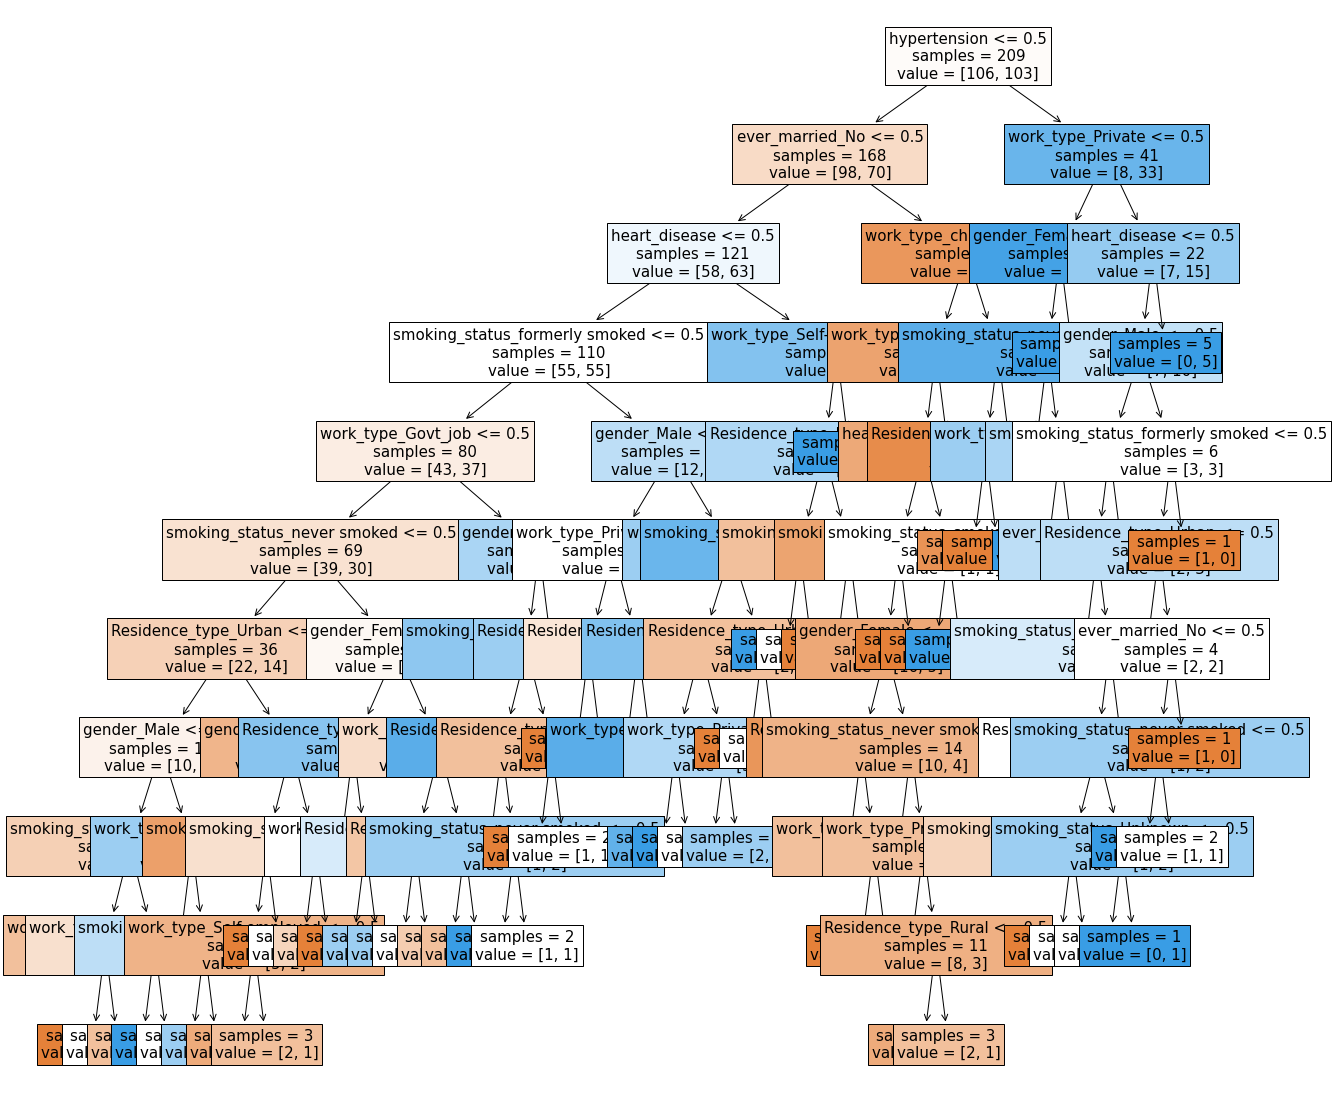

In [53]:
# Visualização da Árvore de Decisão que foi gerada
plt.figure( figsize=(20,20) )
a = plot_tree(tree, feature_names=df_features.columns, fontsize=15, 
              node_ids=False, impurity=False, filled=True)

## Teste 2 - 
Retirada da coluna de ID.

Colunas representadas - 

* avg_glucose_level
* bmi
* age
* hypertension
* heart_disease
* stroke
* gender_Female
* gender_Male 
* gender_Other
* ever_married_No
* ever_married_Yes
* work_type_Govt_job
* work_type_Never_worked
* work_type_Private
* work_type_Self-employed
* work_type_children
* Residence_type_Rural
* Residence_type_Urban
* smoking_status_Unknown
* smoking_status_formerly smoked
* smoking_status_never smoked
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

Número de Árvores Criadas
* 1000

In [112]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]
df_h0_stroke = df_h0_stroke.dropna()

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]
df_no_stroke = df_no_stroke.dropna()

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:df_h0_stroke.shape[0]]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

df = df_h0.drop(columns=['id'])
df = df.dropna()

# Criação do DataFrame de Features
df_features = df.drop(columns=['stroke'])
x = df_features.to_numpy()
x

# Criação do DataFrame de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_rotulo = df_stroke.replace(0,-1)
y = df_rotulo.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

# lista que armazena os valores da acurácia de cada iteração do modelo
acuracia = []

# Realizar o processo de criação de árvore 1000 vezes, para termos uma ideia melhor do desempenho do modelo
for _ in range(1000):

    # criação da árvore de decisão
    tree = DecisionTreeClassifier(criterion='entropy')

    # Agora, vamos usar o método .fit() para ajustar os parâmetros da árvore:
    tree.fit(X_train, Y_train)

    # Tentando prever os AVCs
    y_pred = tree.predict(X_test)

    # Calculando Acurácia
    acc = accuracy_score(y_pred,Y_test)
    acuracia.append(acc)

# gravando os resultados em CSV
df_acc = pd.DataFrame({'Accuracy':acuracia})
df_acc['Accuracy'] *= 100
df_acc.to_csv('data/tree/teste2.csv')

In [113]:
acuracia = pd.read_csv('data/tree/teste2.csv')['Accuracy'].mean()
print(f'Acurácia Média : {np.mean(acuracia):.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Acurácia Média : 67.24%
Hipótese Nula : 50.00%


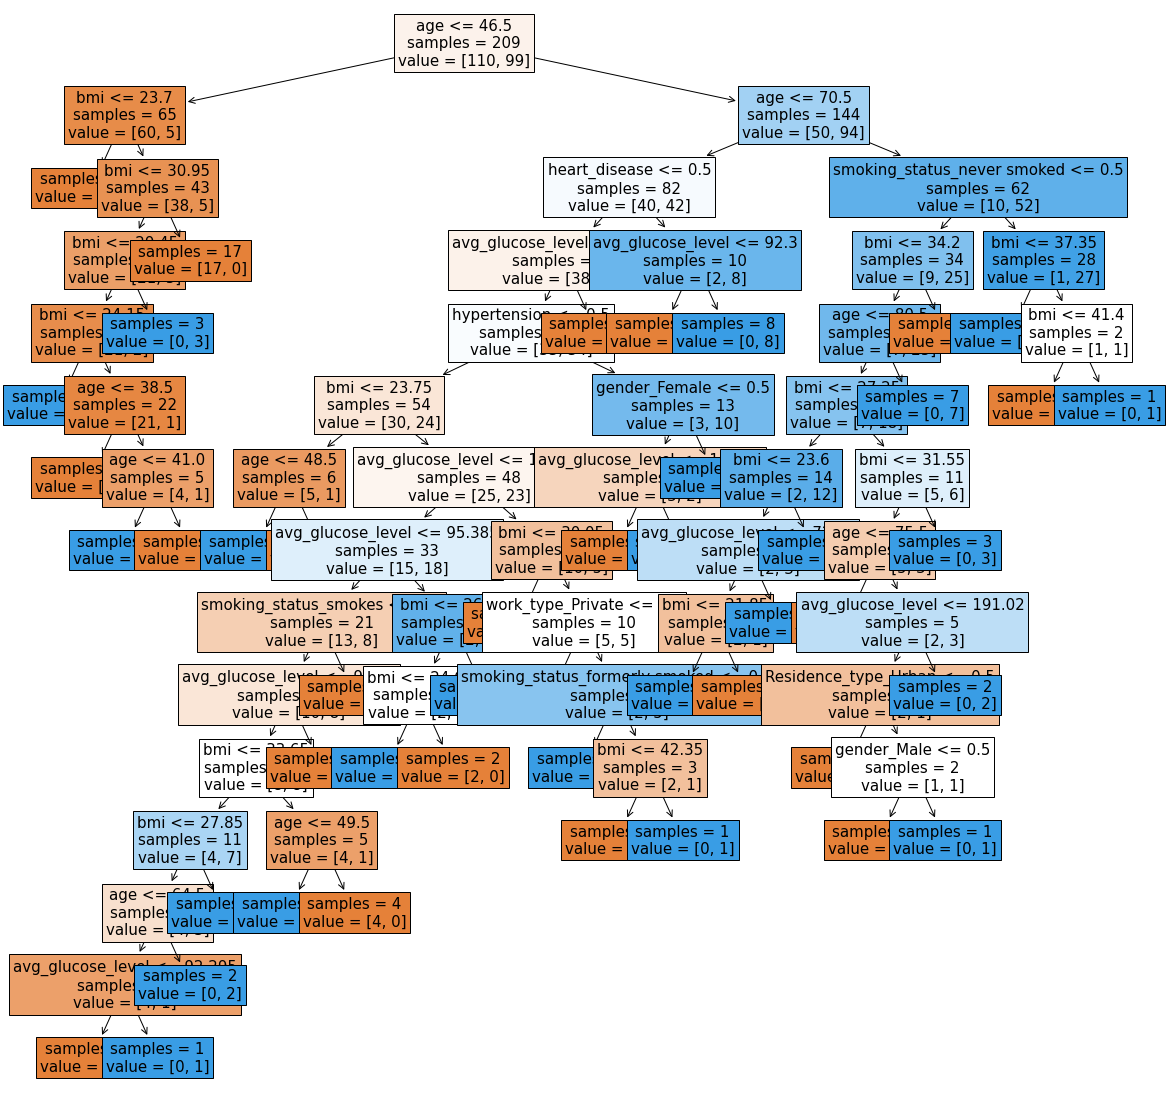

In [56]:
# Visualização da Árvore de Decisão que foi gerada
plt.figure( figsize=(20,20) )
a = plot_tree(tree, feature_names=df_features.columns, fontsize=15, 
              node_ids=False, impurity=False, filled=True)

## Teste 3 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano, além de variáveis relacionadas a condição de vida do indivíduo (trabalho, moradia, etc.).

Colunas representadas - 
* avg_glucose_level
* bmi
* age
* hypertension
* heart_disease
* stroke	
* smoking_status_Unknown	
* smoking_status_formerly smoked	
* smoking_status_never smoked	
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

Número de Árvores Criadas
* 1000

In [116]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]
df_h0_stroke = df_h0_stroke.dropna()

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]
df_no_stroke = df_no_stroke.dropna()

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:df_h0_stroke.shape[0]]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

df = df_h0.drop(columns=['id'])
df = df.dropna()

# Criação do DataFrame de Features
df_features = df.drop(columns=['stroke','gender_Female',	'gender_Male',	'gender_Other',	'ever_married_No',	'ever_married_Yes',	'work_type_Govt_job',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Rural',	'Residence_type_Urban'])
x = df_features.to_numpy()
x

# Criação do DataFrame de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_rotulo = df_stroke.replace(0,-1)
y = df_rotulo.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

# lista que armazena os valores da acurácia de cada iteração do modelo
acuracia = []

# Realizar o processo de criação de árvore 1000 vezes, para termos uma ideia melhor do desempenho do modelo
for _ in range(1000):

    # criação da árvore de decisão
    tree = DecisionTreeClassifier(criterion='entropy')

    # Agora, vamos usar o método .fit() para ajustar os parâmetros da árvore:
    tree.fit(X_train, Y_train)

    # Tentando prever os AVCs
    y_pred = tree.predict(X_test)

    # Calculando Acurácia
    acc = accuracy_score(y_pred,Y_test)
    acuracia.append(acc)

# gravando os resultados em CSV
df_acc = pd.DataFrame({'Accuracy':acuracia})
df_acc['Accuracy'] *= 100
df_acc.to_csv('data/tree/teste3.csv')

In [117]:
acuracia = pd.read_csv('data/tree/teste3.csv')['Accuracy'].mean()
print(f'Acurácia Média : {np.mean(acuracia):.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Acurácia Média : 66.42%
Hipótese Nula : 50.00%


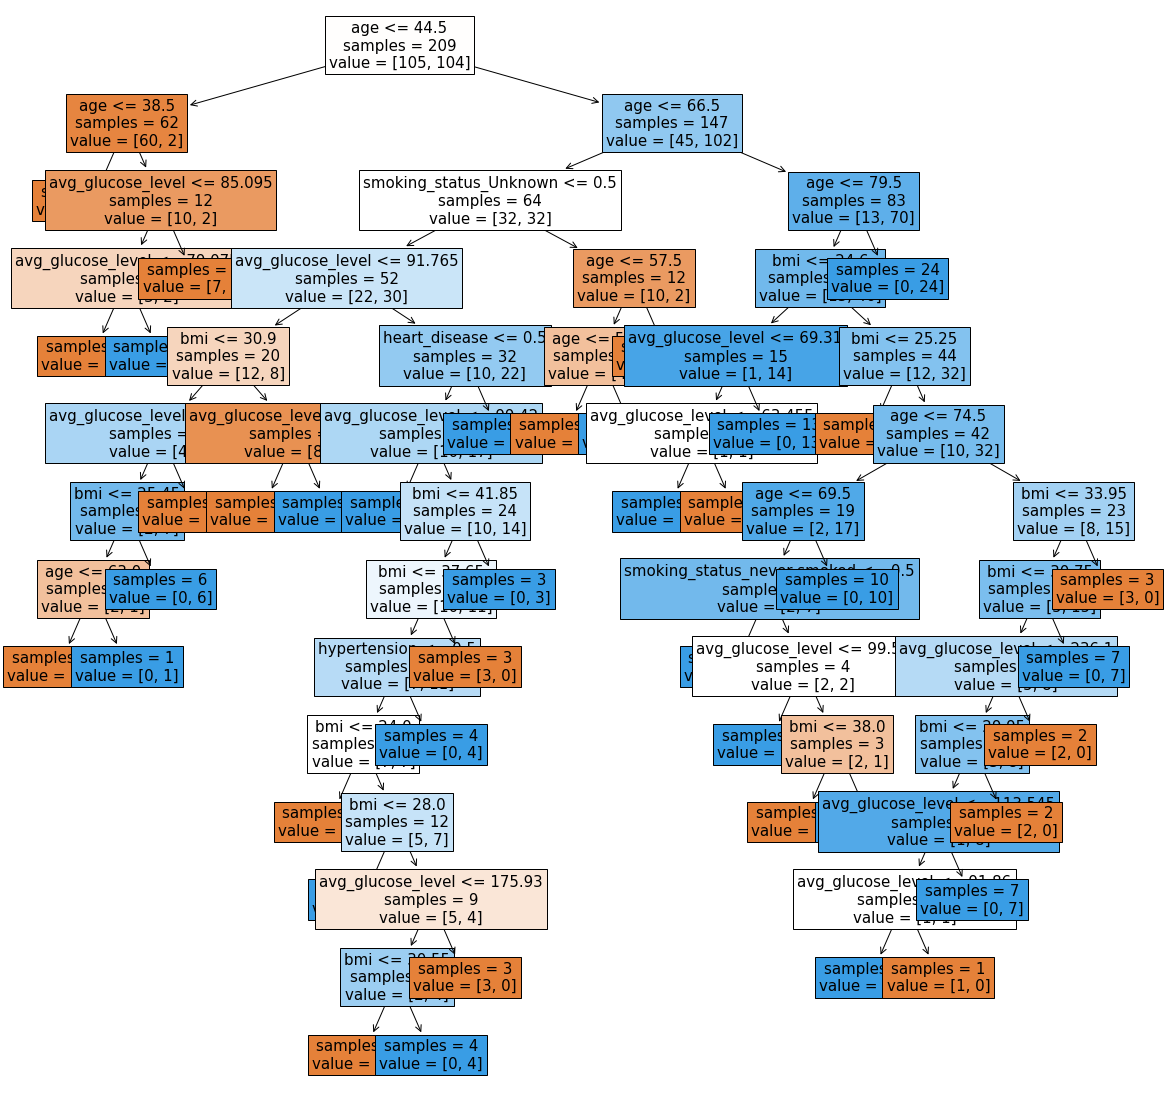

In [71]:
# Visualização da Árvore de Decisão que foi gerada
plt.figure( figsize=(20,20) )
a = plot_tree(tree, feature_names=df_features.columns, fontsize=15, 
              node_ids=False, impurity=False, filled=True)

## Teste 4 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano.

Colunas representadas - 
* avg_glucose_level
* bmi
* age
* hypertension
* heart_disease
* stroke
* gender_Female
* gender_Male 
* gender_Other
* work_type_Govt_job
* work_type_Never_worked
* work_type_Private
* work_type_Self-employed
* work_type_children
* smoking_status_Unknown
* smoking_status_formerly smoked
* smoking_status_never smoked
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

Número de Árvores geradas - 
* 1000

In [162]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]
df_h0_stroke = df_h0_stroke.dropna()

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]
df_no_stroke = df_no_stroke.dropna()

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:df_h0_stroke.shape[0]]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

df = df_h0.drop(columns=['id'])
df = df.dropna()

# Criação do DataFrame de Features
df_features = df.drop(columns=['stroke','ever_married_No','ever_married_Yes','Residence_type_Rural','Residence_type_Urban'])
x = df_features.to_numpy()
x

# Criação do DataFrame de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_rotulo = df_stroke.replace(0,-1)
y = df_rotulo.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

# lista que armazena os valores da acurácia de cada iteração do modelo
acuracia = []

# Realizar o processo de criação de árvore 1000 vezes, para termos uma ideia melhor do desempenho do modelo
for _ in range(1000):

    # criação da árvore de decisão
    tree = DecisionTreeClassifier(criterion='entropy')

    # Agora, vamos usar o método .fit() para ajustar os parâmetros da árvore:
    tree.fit(X_train, Y_train)

    # Tentando prever os AVCs
    y_pred = tree.predict(X_test)

    # Calculando Acurácia
    acc = accuracy_score(y_pred,Y_test)
    acuracia.append(acc)

# gravando os resultados em CSV
df_acc = pd.DataFrame({'Accuracy':acuracia})
df_acc['Accuracy'] *= 100
df_acc.to_csv('data/tree/teste4.csv')

In [163]:
acuracia = pd.read_csv('data/tree/teste4.csv')['Accuracy'].mean()
print(f'Acurácia Média : {np.mean(acuracia):.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Acurácia Média : 70.69%
Hipótese Nula : 50.00%


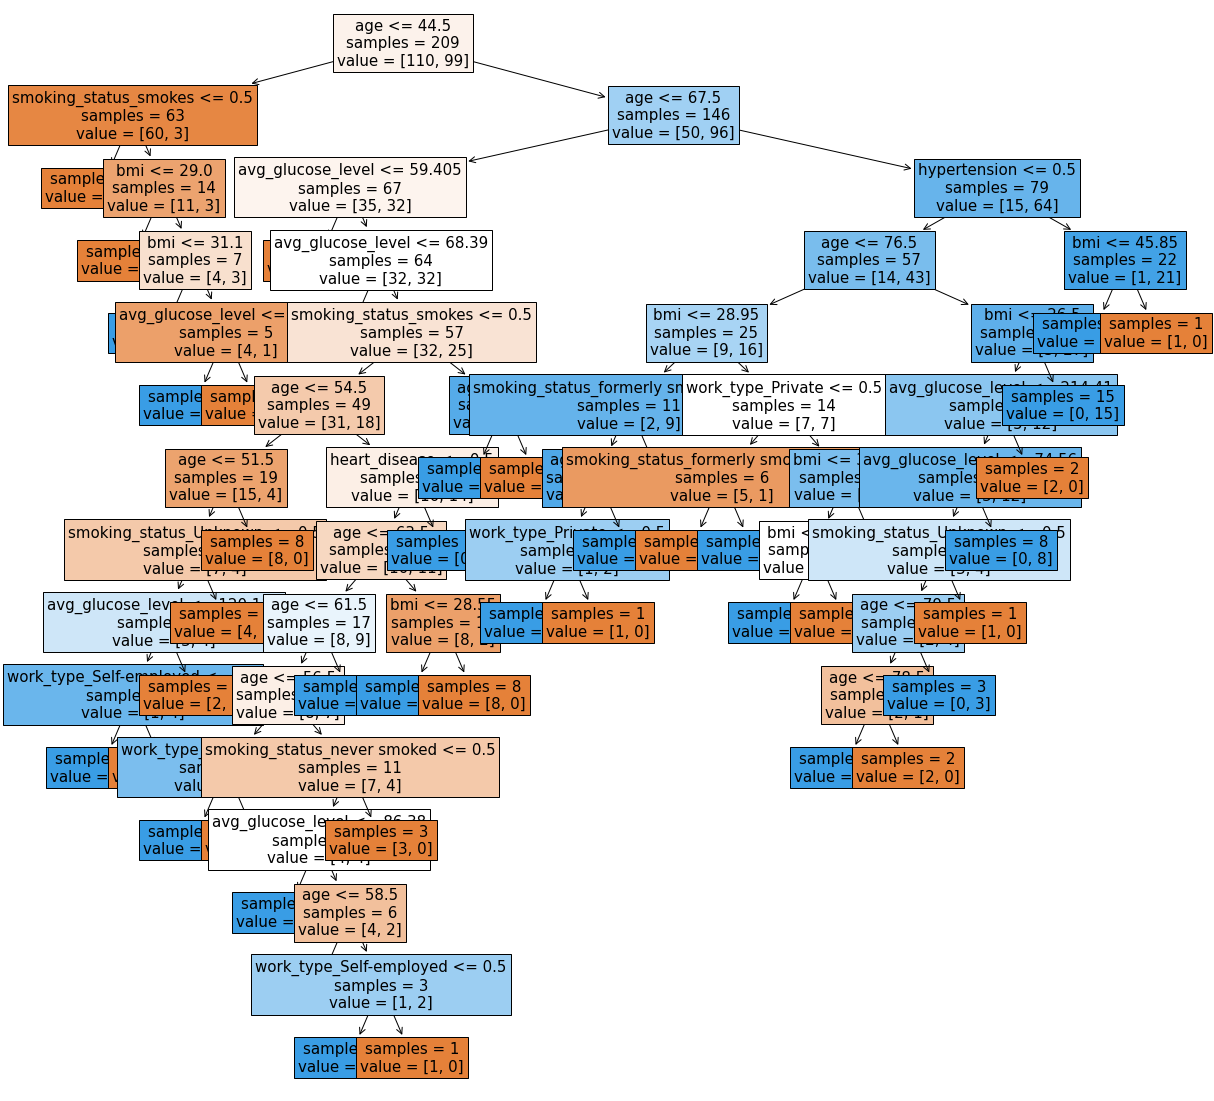

In [165]:
# Visualização da Árvore de Decisão que foi gerada
plt.figure( figsize=(20,20) )
a = plot_tree(tree, feature_names=df_features.columns, fontsize=15, 
              node_ids=False, impurity=False, filled=True)